# Plot PC loadings contributions and correlation of oncogenic and immune signalings

Script related to figure s5c-d

### Aim:
- Plot Hallmarks NES PCA loadings contributions

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype

In [3]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [4]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


## Load ssGSEA results

In [6]:
file_nes = home + 'Data/5/HallmarksStromaImmune_NACT_NES.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [7]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.092696,0.159109,0.221560,0.210024,0.099785,0.118758,0.100212,0.272152,0.108368,0.099014,...,0.166682,0.180770,0.182044,0.123420,0.167660,0.177934,0.175181,0.249246,0.163605,0.283639
HALLMARK_HYPOXIA,0.186010,0.196143,0.214819,0.237168,0.192770,0.204423,0.165283,0.278923,0.201645,0.195268,...,0.213112,0.231052,0.221524,0.238599,0.243462,0.232689,0.204692,0.258383,0.231907,0.286908
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.255208,0.282680,0.285083,0.260298,0.321267,0.309121,0.292943,0.313486,0.286084,0.277111,...,0.322881,0.262719,0.292338,0.381793,0.237000,0.292132,0.267533,0.301603,0.295406,0.393218
HALLMARK_MITOTIC_SPINDLE,0.305218,0.317705,0.293826,0.255306,0.278673,0.302507,0.298289,0.265211,0.338190,0.302091,...,0.292191,0.312170,0.317407,0.400398,0.324670,0.305270,0.306001,0.298000,0.302720,0.303047
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.218775,0.238017,0.212214,0.256485,0.252541,0.250670,0.242941,0.173667,0.262190,0.294071,...,0.245270,0.289621,0.233977,0.296323,0.177104,0.233127,0.223970,0.227052,0.261404,0.235832


### Check empty cells

In [8]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [9]:
mRNA_tumcell_file = home + 'Data/5/NACT_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [10]:
mRNA_tumcell.head().head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,150.243978,100.962227,967.051900,808.453034,-65.569315,489.893858,490.720381,1061.377025,235.450362,418.150347,...,263.744096,464.939728,802.734452,153.081049,1103.804616,579.702569,788.616732,1237.456125,887.344608,501.153545
ImmuneScore,176.145317,526.978700,1297.193578,1203.727348,131.468582,650.323221,407.055460,1082.029608,88.028614,282.209677,...,481.526245,516.592649,582.005013,29.396052,908.321033,258.334588,849.462145,1496.053219,969.848566,621.394231
ESTIMATEScore,326.389295,627.940928,2264.245478,2012.180381,65.899267,1140.217080,897.775841,2143.406633,323.478976,700.360025,...,745.270341,981.532377,1384.739465,182.477100,2012.125649,838.037157,1638.078877,2733.509343,1857.193174,1122.547776
TumorPurity,0.794327,0.766668,0.591924,0.621334,0.816969,0.716267,0.740642,0.606127,0.794586,0.759799,...,0.755497,0.732326,0.690764,0.806982,0.621341,0.746506,0.663403,0.535046,0.638998,0.718075


### Add mRNA purity to NES dataframe

In [11]:
data_nes_t = data_nes.T 

#### Multiply purity times a small number to reduce it's impact in the PCA

In [12]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [13]:
data_nes = data_nes_t.T 

In [14]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_DN,-0.111366,-0.116319,-0.122007,-0.096597,-0.106269,-0.118997,-0.102549,-0.109274,-0.136147,-0.115405,...,-0.139325,-0.162815,-0.121599,-0.190920,-0.141080,-0.111751,-0.141831,-0.126286,-0.127925,-0.167178
HALLMARK_PANCREAS_BETA_CELLS,-0.146457,-0.171530,-0.229520,-0.139607,-0.137008,-0.151976,-0.239809,-0.162335,-0.164499,-0.187457,...,-0.228200,-0.152731,-0.218332,-0.196034,-0.157134,-0.126800,-0.179381,-0.216867,-0.193094,-0.209325
StromalSignature,0.068301,0.070667,0.269651,0.224186,0.023423,0.157401,0.155407,0.292664,0.095977,0.135368,...,0.104112,0.155909,0.228005,0.088713,0.296492,0.180196,0.221126,0.332099,0.245865,0.172484
ImmuneSignature,0.074691,0.169467,0.345730,0.317359,0.069114,0.197182,0.135779,0.299572,0.063372,0.103880,...,0.153753,0.167914,0.175292,0.058984,0.256096,0.108475,0.235833,0.393539,0.265829,0.201392
TumourCellularity_mRNA,0.000079,0.000077,0.000059,0.000062,0.000082,0.000072,0.000074,0.000061,0.000079,0.000076,...,0.000076,0.000073,0.000069,0.000081,0.000062,0.000075,0.000066,0.000054,0.000064,0.000072


### Visulase NES

#### Samples

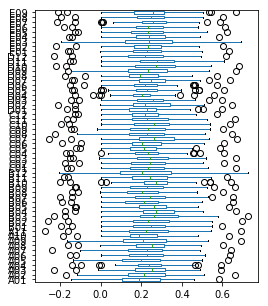

In [15]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

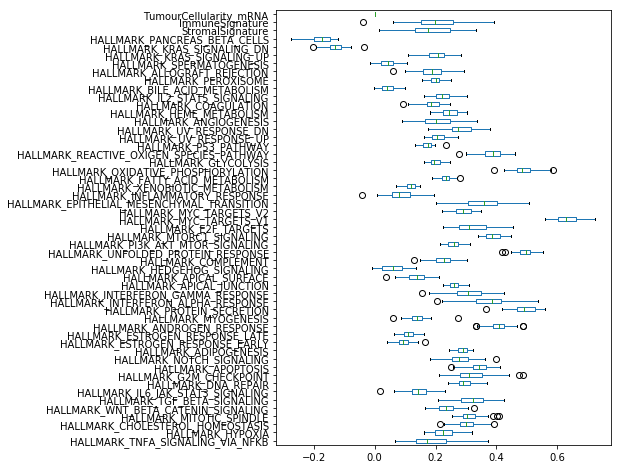

In [16]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Plot features PCs contributions

### Define gene set colors

In [17]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'HALLMARK_INTERFERON_ALPHA_RESPONSE':           GREEN,
'HALLMARK_INTERFERON_GAMMA_RESPONSE':           GREEN,
'ImmuneSignature':                              GREEN,
'HALLMARK_E2F_TARGETS':                         RED,
'HALLMARK_SPERMATOGENESIS':                     GREY,
'HALLMARK_INFLAMMATORY_RESPONSE':               GREEN,
'HALLMARK_G2M_CHECKPOINT':                      RED,
'HALLMARK_PANCREAS_BETA_CELLS':                 GREY,
'HALLMARK_OXIDATIVE_PHOSPHORYLATION':           GREY,
'HALLMARK_MYC_TARGETS_V1':                      RED,
'HALLMARK_FATTY_ACID_METABOLISM':               GREY,
'HALLMARK_PEROXISOME':                          GREY,
'HALLMARK_DNA_REPAIR':                          RED,
'HALLMARK_UNFOLDED_PROTEIN_RESPONSE':           'purple',
'HALLMARK_KRAS_SIGNALING_DN':                   RED,
'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY':     'purple',
'HALLMARK_CHOLESTEROL_HOMEOSTASIS':             GREY,
'HALLMARK_COMPLEMENT':                          GREEN,
'HALLMARK_MTORC1_SIGNALING':                    RED,
'HALLMARK_IL2_STAT5_SIGNALING':                 GREEN,
'HALLMARK_ADIPOGENESIS':                        GREY,
'HALLMARK_KRAS_SIGNALING_UP':                   RED,
'HALLMARK_HEME_METABOLISM':                     GREY,
'HALLMARK_PI3K_AKT_MTOR_SIGNALING':             RED,
'HALLMARK_ANDROGEN_RESPONSE':                   GREY,
'HALLMARK_PROTEIN_SECRETION':                   GREY,
'HALLMARK_P53_PATHWAY':                         RED,
'HALLMARK_UV_RESPONSE_UP':                      'purple',
'HALLMARK_MYC_TARGETS_V2':                      RED,
'StromalSignature':                             BLUE,
'HALLMARK_MITOTIC_SPINDLE':                     RED,
'HALLMARK_GLYCOLYSIS':                          RED,
'HALLMARK_APICAL_JUNCTION':                     BLUE,
'HALLMARK_HYPOXIA':                             'purple',
'HALLMARK_TNFA_SIGNALING_VIA_NFKB':             GREEN,
'HALLMARK_APOPTOSIS':                           GREY,
'HALLMARK_APICAL_SURFACE':                      GREY,
'HALLMARK_UV_RESPONSE_DN':                      'purple',
'HALLMARK_TGF_BETA_SIGNALING':                  'purple',
'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':   BLUE,
'HALLMARK_NOTCH_SIGNALING':                     RED,
'HALLMARK_WNT_BETA_CATENIN_SIGNALING':          RED,
'HALLMARK_ALLOGRAFT_REJECTION':                 GREEN,
'HALLMARK_XENOBIOTIC_METABOLISM':               GREY,
'HALLMARK_ANGIOGENESIS':                        BLUE,
'HALLMARK_BILE_ACID_METABOLISM':                GREY,
'HALLMARK_COAGULATION':                         GREY,
'HALLMARK_ESTROGEN_RESPONSE_EARLY':             GREY,
'HALLMARK_ESTROGEN_RESPONSE_LATE':              GREY,
'HALLMARK_HEDGEHOG_SIGNALING':                  RED,
'HALLMARK_IL6_JAK_STAT3_SIGNALING':             GREEN,
'HALLMARK_MYOGENESIS':                          GREY,
'TumourCellularity_mRNA':                       'k'
}

### Separate matched and unmatched samples

In [18]:
matched = [3368,371,9717,8674,2359,564,7765,6965,9347]

matched_df = sample_labels[sample_labels['Case_mRNA'].isin(matched)]

unmatched_df = sample_labels[~sample_labels['Case_mRNA'].isin(matched)]

In [19]:
matched_nes_df = data_nes[matched_df.index]

unmatched_nes_df = data_nes[unmatched_df.index]

### Save matched and unmatched hallmark NES

In [20]:
matched_nes_df.to_csv('../../Data/5/HallmarksStromaImmune_NACT_matched_NES.txt', sep='\t')

In [21]:
unmatched_nes_df.to_csv('../../Data/5/HallmarksStromaImmune_NACT_unmatched_NES.txt', sep='\t')

## Calculate matched PCA

In [22]:
pca = PCA(n_components=7)

In [23]:
pca_nes = pca.fit_transform(matched_nes_df.transpose())

In [24]:
len(pca_nes) # check number of data points

18

In [25]:
var_exp = sorted(pca.explained_variance_ratio_, reverse=True)

### Dump components relations with features

In [26]:
components = pd.DataFrame(pca.components_, columns=data_nes.transpose().columns)

In [27]:
components.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature,TumourCellularity_mRNA
0,-0.259410,-0.112656,-0.030129,0.008677,0.076517,-0.105509,-0.202778,-0.000908,0.087049,-0.140535,...,-0.057594,-0.013277,-0.209434,0.077004,-0.155825,0.031212,0.003793,-0.334310,-0.438957,0.000034
1,-0.037033,0.017334,0.143957,0.181590,0.009712,0.074727,0.048049,0.207364,0.433047,0.078384,...,-0.095865,0.044840,0.078547,0.013921,-0.019258,-0.107871,-0.195049,-0.109249,-0.066437,0.000010
2,0.157669,0.000133,0.010972,-0.158320,-0.023859,-0.047592,0.094143,-0.085460,-0.053082,-0.015806,...,-0.005979,0.067273,0.080658,0.105277,0.031800,0.158704,0.180289,-0.289622,0.161874,0.000003
3,-0.313670,-0.163528,-0.021165,0.066182,0.203646,-0.274316,0.061289,-0.076103,-0.039681,0.064755,...,-0.053496,0.007618,0.011605,-0.072817,-0.044432,-0.124975,-0.043376,0.137366,0.013483,-0.000007
4,-0.221030,-0.088184,-0.040130,0.039807,0.355034,-0.365942,-0.070629,0.001966,-0.090572,-0.129435,...,0.058318,0.179656,-0.023850,0.143900,0.027053,0.003288,-0.189982,0.193265,0.024468,-0.000009


### PCs barplots

In [28]:
feature_names = pd.Series(components.columns.values,name='features')

In [29]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [30]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [31]:
fcolors_df = pd.DataFrame({'index':pc_df.index, 'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [32]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

### Hallmarks colours

In [33]:
colours = ['#0000E5','#007F00','#CC0000','#D3D3D3','k','purple']
categories = ['stroma','immune','oncogenic','other','tumour_cellularity','stress']

pc_df['category'] = pc_df.color.replace(colours,
                                        categories)

cat_order = ['tumour_cellularity','oncogenic','stress','immune','stroma','other']

cat_type = CategoricalDtype(categories=cat_order,
                            ordered=True)

### Sort features within PCs

In [34]:
pc_df['category'] = pc_df['category'].astype(cat_type)

pc_df0 = pc_df.sort_values(by=['category',0],
                           inplace=False)  

pc_df0['feature'] = pc_df0.index

pc_df1 = pc_df.sort_values(by=['category',1],
                           inplace=False)

pc_df1['feature'] = pc_df1.index

pc_df2 = pc_df.sort_values(by=['category',2],
                           inplace=False)

pc_df2['feature'] = pc_df2.index

pc_df3 = pc_df.sort_values(by=['category',3],
                           inplace=False)  

pc_df3['feature'] = pc_df3.index

pc_df4 = pc_df.sort_values(by=['category',4],
                           inplace=False)  

pc_df4['feature'] = pc_df4.index

pc_df5 = pc_df.sort_values(by=['category',5],
                           inplace=False)  

pc_df5['feature'] = pc_df5.index

pc_df6 = pc_df.sort_values(by=['category',6],
                           inplace=False) 

pc_df6['feature'] = pc_df6.index

### Plot

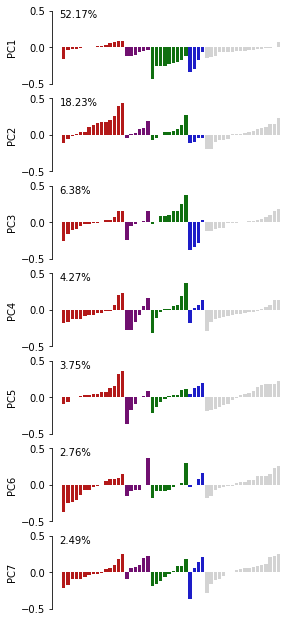

In [36]:
y_anotate=0.4

fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7,
                                                 ncols=1,
                                                 figsize=(4, 11),
                                                 sharex=True,
                                                 sharey=True)                                               

sns.barplot(x='feature',
            y=0,
            data=pc_df0,
            palette=pc_df0.color,
            ax=ax0)

ax0.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[0]*100,2))+'%')
ax0.set_ylabel("PC1")
ax0.set_xlabel('')
ax0.set_ylim([-0.5,0.5])
sns.despine(bottom=True,trim=True,offset=5)


sns.barplot(x='feature',
            y=1,
            data=pc_df1,
            palette=pc_df1.color,
            ax=ax1)

ax1.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[1]*100,2))+'%')
ax1.set_ylabel("PC2")
ax1.set_xlabel('')


sns.barplot(x='feature',
            y=2,
            data=pc_df2,
            palette=pc_df2.color,
            ax=ax2)

ax2.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[2]*100,2))+'%')
ax2.set_ylabel("PC3")
ax2.set_xlabel('')


sns.barplot(x='feature',
            y=3,
            data=pc_df3,
            palette=pc_df3.color,
            ax=ax3)

ax3.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[3]*100,2))+'%')
ax3.set_ylabel("PC4")
ax3.set_xlabel('')


sns.barplot(x='feature',
            y=4,
            data=pc_df4,
            palette=pc_df4.color,
            ax=ax4)

ax4.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[4]*100,2))+'%')
ax4.set_ylabel("PC5")
ax4.set_xlabel('')


sns.barplot(x='feature',
            y=5,
            data=pc_df5,
            palette=pc_df5.color,
            ax=ax5)

ax5.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[5]*100,2))+'%')
ax5.set_ylabel("PC6")
ax5.set_xlabel('')

sns.barplot(x='feature',
            y=6,
            data=pc_df6,
            palette=pc_df6.color,
            ax=ax6)

ax6.text(x=0,y=y_anotate,
         s=str(round(var_exp[6]*100,2))+'%')
ax6.set_ylabel("PC7")
ax6.set_xlabel('')

# Finalize the plot
sns.despine(bottom=True,trim=True,offset=5)
plt.setp(fig.axes,xticks=[])

plt.show()

### Save plot

In [37]:
file_name = '../../Figures/supplementary/5/panels/s5c_NACT_matched_Hallmark_PCs_loadings.pdf'

fig.savefig(file_name, bbox='tight')

In [38]:
matched_stress = pc_df0[pc_df0["category"] == "stress"][0]
matched_immune = pc_df0[pc_df0["category"] == "immune"][0]
matched_stroma = pc_df0[pc_df0["category"] == "stroma"][0]

## Calculate unmatched PCA

In [39]:
pca = PCA(n_components=7)

In [40]:
pca_nes = pca.fit_transform(unmatched_nes_df.transpose())

In [41]:
len(pca_nes) # check number of data points

38

In [42]:
var_exp = sorted(pca.explained_variance_ratio_, reverse=True)

### Dump components relations with features

In [43]:
components = pd.DataFrame(pca.components_, columns=data_nes.transpose().columns)

In [44]:
components.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature,TumourCellularity_mRNA
0,-0.269423,-0.130122,0.026158,0.024647,0.000912,-0.108252,-0.233156,0.033632,0.116258,-0.133944,...,-0.008876,-0.032706,-0.199412,0.024886,-0.148326,0.011204,0.037248,-0.367998,-0.401150,0.000033
1,-0.091434,-0.106604,-0.232474,-0.214954,-0.170931,-0.248924,0.002412,-0.174453,-0.301876,-0.155838,...,0.036429,-0.058782,-0.003909,0.023265,-0.014159,0.185148,0.113654,0.111218,0.109671,-0.000012
2,0.227621,0.217186,0.101469,-0.035953,0.007197,0.237330,-0.136459,-0.015270,-0.164894,0.042526,...,0.037845,-0.039292,-0.221847,-0.083759,0.038763,-0.047330,0.086526,0.047064,-0.222452,0.000009
3,0.229854,0.004306,0.085502,-0.162917,-0.004602,0.077655,0.098014,-0.054597,-0.305833,0.033218,...,0.156386,0.051928,0.029176,-0.093136,-0.092922,0.033717,0.141789,-0.333156,0.063888,0.000013
4,0.277632,0.081962,0.140692,0.015696,0.047852,-0.141835,0.137864,0.061840,0.139323,0.038013,...,0.040000,0.049685,0.060367,0.164028,0.109431,0.053582,0.151341,-0.251689,0.161098,0.000002


### PCs barplots

In [45]:
feature_names = pd.Series(components.columns.values,name='features')

In [46]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [47]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [48]:
fcolors_df = pd.DataFrame({'index':pc_df.index,
                           'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [49]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

### Hallmarks colours

In [50]:
colours = ['#0000E5','#007F00','#CC0000','#D3D3D3','k','purple']
categories = ['stroma','immune','oncogenic','other','tumour_cellularity','stress']

pc_df['category'] = pc_df.color.replace(colours,
                                        categories)

cat_order = ['tumour_cellularity','oncogenic','stress','immune','stroma','other']

cat_type = CategoricalDtype(categories=cat_order,
                            ordered=True)

### Sort features within PCs

In [51]:
pc_df['category'] = pc_df['category'].astype(cat_type)

pc_df0 = pc_df.sort_values(by=['category',0],
                           inplace=False)  

pc_df0['feature'] = pc_df0.index

pc_df1 = pc_df.sort_values(by=['category',1],
                           inplace=False)

pc_df1['feature'] = pc_df1.index

pc_df2 = pc_df.sort_values(by=['category',2],
                           inplace=False)

pc_df2['feature'] = pc_df2.index

pc_df3 = pc_df.sort_values(by=['category',3],
                           inplace=False)  

pc_df3['feature'] = pc_df3.index

pc_df4 = pc_df.sort_values(by=['category',4],
                           inplace=False)  

pc_df4['feature'] = pc_df4.index

pc_df5 = pc_df.sort_values(by=['category',5],
                           inplace=False)  

pc_df5['feature'] = pc_df5.index

pc_df6 = pc_df.sort_values(by=['category',6],
                           inplace=False) 

pc_df6['feature'] = pc_df6.index

### Plot

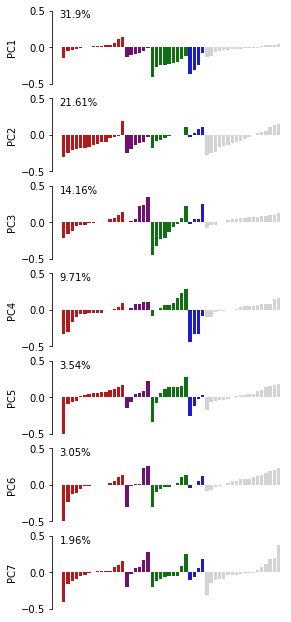

In [53]:
y_anotate=0.4

fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7,
                                                 ncols=1,
                                                 figsize=(4, 11),
                                                 sharex=True,
                                                 sharey=True)                                               

sns.barplot(x='feature',
            y=0,
            data=pc_df0,
            palette=pc_df0.color,
            ax=ax0)

ax0.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[0]*100,2))+'%')
ax0.set_ylabel("PC1")
ax0.set_xlabel('')
ax0.set_ylim([-0.5,0.5])
sns.despine(bottom=True,trim=True,offset=5)


sns.barplot(x='feature',
            y=1,
            data=pc_df1,
            palette=pc_df1.color,
            ax=ax1)

ax1.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[1]*100,2))+'%')
ax1.set_ylabel("PC2")
ax1.set_xlabel('')


sns.barplot(x='feature',
            y=2,
            data=pc_df2,
            palette=pc_df2.color,
            ax=ax2)

ax2.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[2]*100,2))+'%')
ax2.set_ylabel("PC3")
ax2.set_xlabel('')


sns.barplot(x='feature',
            y=3,
            data=pc_df3,
            palette=pc_df3.color,
            ax=ax3)

ax3.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[3]*100,2))+'%')
ax3.set_ylabel("PC4")
ax3.set_xlabel('')


sns.barplot(x='feature',
            y=4,
            data=pc_df4,
            palette=pc_df4.color,
            ax=ax4)

ax4.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[4]*100,2))+'%')
ax4.set_ylabel("PC5")
ax4.set_xlabel('')


sns.barplot(x='feature',
            y=5,
            data=pc_df5,
            palette=pc_df5.color,
            ax=ax5)

ax5.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[5]*100,2))+'%')
ax5.set_ylabel("PC6")
ax5.set_xlabel('')

sns.barplot(x='feature',
            y=6,
            data=pc_df6,
            palette=pc_df6.color,
            ax=ax6)

ax6.text(x=0,y=y_anotate,
         s=str(round(var_exp[6]*100,2))+'%')
ax6.set_ylabel("PC7")
ax6.set_xlabel('')

# Finalize the plot
sns.despine(bottom=True,trim=True,offset=5)
plt.setp(fig.axes,xticks=[])

plt.show()

### Save plot

In [55]:
file_name = '../../Figures/supplementary/5/panels/s5c_NACT_unmatched_Hallmark_PCs_loadings.pdf'

fig.savefig(file_name, bbox='tight')

# Correlate oncogenic and immune signaling

In [78]:
import scipy.stats

In [79]:
wnt="HALLMARK_WNT_BETA_CATENIN_SIGNALING"
mycv2="HALLMARK_MYC_TARGETS_V2"
y="ImmuneSignature"

In [83]:
def scatterplot(x, df):
    
    g = sns.lmplot(x=x,
                   y=y,
                   data=df,
                   truncate=True,
                   scatter_kws={'color':'None'},
                   line_kws={'color':'k',
                             'zorder':0})
    
    for sample in df.index:
    
        x_tumcell = df[x][sample]
        y_tumcell = df[y][sample]

        treatment = sample_labels["NACT"][sample]

        colour = "b" if treatment == "Untreated" else "r"

        site = sample_labels["Site"][sample]

        if site == "ovary":
            marker = "o"
        elif site == "omentum":
            marker = "^"
        else:
            marker = "s"

        plt.scatter(x_tumcell,
                    y_tumcell,
                    marker=marker,
                    c=colour,
                    zorder=1)

    axes = g.axes

    axes[0,0].set_xlim(0.15,0.35)
    axes[0,0].set_ylim(-0.1,0.4)

    sns.despine(trim=False)
    
    plt.show()
    
    return g

### WNT matched

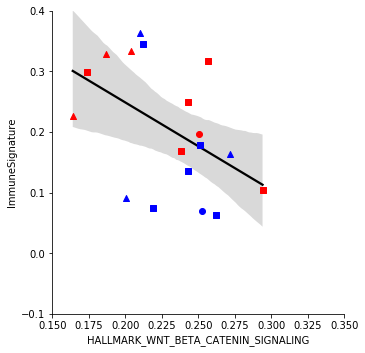

In [94]:
x = wnt

df = matched_nes_df.T

g = scatterplot(x, df)

In [85]:
g.savefig('../../Figures/supplementary/5/panels/s5d_'+x+'_Immune_corr_matched.pdf', bbox='tight')

### Myc v2 matched


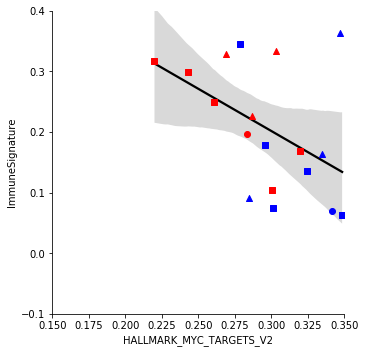

In [95]:
x = mycv2

df = matched_nes_df.T

g = scatterplot(x, df)

In [96]:
g.savefig('../../Figures/supplementary/5/panels/s5d_'+x+'_Immune_corr_matched.pdf', bbox='tight')

### Stats

In [98]:
correlations = []
for hallmark in set([wnt, mycv2]):
    
    x = hallmark

    print(hallmark+"\n")

    x_values = df[x].values
    y_values = df["ImmuneSignature"].values

    n1 = scipy.stats.shapiro(x_values)[1]
    n2 = scipy.stats.shapiro(y_values)[1]

    n3 = scipy.stats.normaltest(x_values)[1]
    n4 = scipy.stats.normaltest(y_values)[1]

    n5 = scipy.stats.anderson(x_values)
    n6 = scipy.stats.anderson(y_values)

    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(x_values, y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(x_values,y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")

    if min([n1,n2,h1]) < 0.05:

        print("KENDALL")

        print(scipy.stats.kendalltau(x_values,y_values,method="asymptotic"))

        cor, p_val = scipy.stats.kendalltau(x_values,y_values,method="asymptotic")
        
        print("\n")

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PEARSON")
        print(scipy.stats.pearsonr(x_values,y_values))

        print("\n")

        cor, p_val = scipy.stats.pearsonr(x_values,y_values)

    correlations.append((hallmark,cor,p_val))

HALLMARK_MYC_TARGETS_V2

Normal
HETEROscedastic

KENDALL
KendalltauResult(correlation=-0.3856209150326798, pvalue=0.02543150936259153)


HALLMARK_WNT_BETA_CATENIN_SIGNALING

Normal
HETEROscedastic

KENDALL
KendalltauResult(correlation=-0.30718954248366015, pvalue=0.07503473777063203)




/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


### WNT unmatched

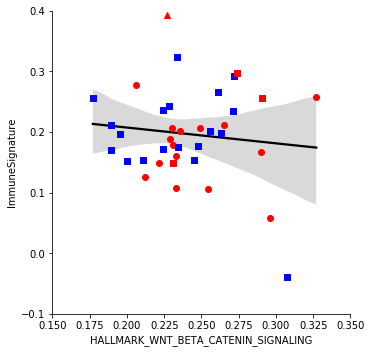

In [99]:
x = wnt

df = unmatched_nes_df.T

g = scatterplot(x, df)

In [100]:
g.savefig('../../Figures/supplementary/5/panels/s5d_'+x+'_Immune_corr_unmatched.pdf', bbox='tight')

### Myc v2 unmatched


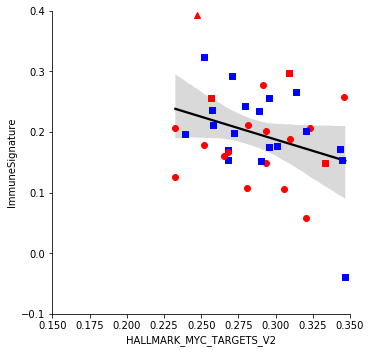

In [101]:
x = mycv2

df = unmatched_nes_df.T

g = scatterplot(x, df)

In [102]:
g.savefig('../../Figures/supplementary/5/panels/s5d_'+x+'_Immune_corr_unmatched.pdf', bbox='tight')

### Stats

In [103]:
correlations = []
for hallmark in set([wnt, mycv2]):
    
    x = hallmark

    print(hallmark+"\n")

    x_values = df[x].values
    y_values = df["ImmuneSignature"].values

    n1 = scipy.stats.shapiro(x_values)[1]
    n2 = scipy.stats.shapiro(y_values)[1]

    n3 = scipy.stats.normaltest(x_values)[1]
    n4 = scipy.stats.normaltest(y_values)[1]

    n5 = scipy.stats.anderson(x_values)
    n6 = scipy.stats.anderson(y_values)

    if min([n1,n2]) < 0.05: # it's not normal

        print("NOT normal")

        h1 = scipy.stats.levene(x_values, y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
            #print(h1)
        else:
            print("HOMOscedastic\n")

    else:

        print("Normal")

        h1 = scipy.stats.bartlett(x_values,y_values)[1]

        if h1 < 0.05:
            print("HETEROscedastic\n")
        else:
            print("HOMOscedastic\n")

    if min([n1,n2,h1]) < 0.05:

        print("KENDALL")

        print(scipy.stats.kendalltau(x_values,y_values,method="asymptotic"))

        cor, p_val = scipy.stats.kendalltau(x_values,y_values,method="asymptotic")
        
        print("\n")

    else:

        print("anderson")

        print(n5[0], n5[1])
        print(n6[0], n6[1])
        print("\n")

        print("PEARSON")
        print(scipy.stats.pearsonr(x_values,y_values))

        print("\n")

        cor, p_val = scipy.stats.pearsonr(x_values,y_values)

    correlations.append((hallmark,cor,p_val))

HALLMARK_MYC_TARGETS_V2

Normal
HETEROscedastic

KENDALL
KendalltauResult(correlation=-0.15789473684210528, pvalue=0.16287071087412586)


HALLMARK_WNT_BETA_CATENIN_SIGNALING

Normal
HETEROscedastic

KENDALL
KendalltauResult(correlation=0.052631578947368425, pvalue=0.6418165399455933)




# End script